# Supervised classification with Random Forest

### Importin the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from helpers import undersampling
from helpers import show_target_pred_dif
from configparser import ConfigParser
import matplotlib.pyplot as plt

In [2]:
config = ConfigParser()
config.read('config.ini')
x_size = int(config['main']['x_size'])
y_size = int(config['main']['y_size'])
clases_names = list(config['classes'].values())
nr_of_classes = len(clases_names)
csv_data_file = config['main']['csv_data_file']

### Preprocessing

In [3]:
df_unchange = pd.read_csv(csv_data_file)
#df = undersampling(df_unchange,clases_names)
df = df_unchange
X = df.iloc[:,:-nr_of_classes].to_numpy()
Y = df.iloc[:,-nr_of_classes:].to_numpy()

Train/test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Feature scaling
$$x = \frac{\overline{x} - x}{\sigma_{x}}$$

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 Dimensionlity reduction: Principal component analysis
 13 -> 10
It speedup learning proces but decrease accuracy

#Applying PCA
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 10)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

TO DO Cross Validation

### Training

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,max_depth=5, random_state=0)
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.9min finished


RandomForestClassifier(max_depth=5, random_state=0, verbose=1)

In [7]:
print(X_test.shape)

(1004670, 14)


### Validation

In [8]:
y_pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.8s finished


acc:  0.7588571371694188


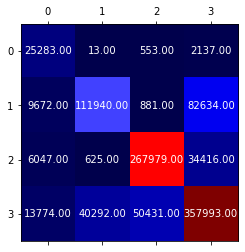

In [9]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("acc: ",accuracy_score(y_test, y_pred))
fig, ax = plt.subplots()
ax.matshow(cm, cmap='seismic')
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',color = 'white')
plt.show()

### Results Presentation

In [10]:
X_present = df_unchange.iloc[:,:-nr_of_classes].to_numpy()
X_present = sc.fit_transform(X_present)
Y_present = clf.predict(X_present)
Y_present = np.rint(Y_present)
Y_present = Y_present.reshape((x_size,y_size,nr_of_classes))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   59.3s finished


In [11]:
Y_target = df_unchange.iloc[:,-nr_of_classes:].to_numpy()
Y_target = Y_target.reshape((x_size,y_size,nr_of_classes))

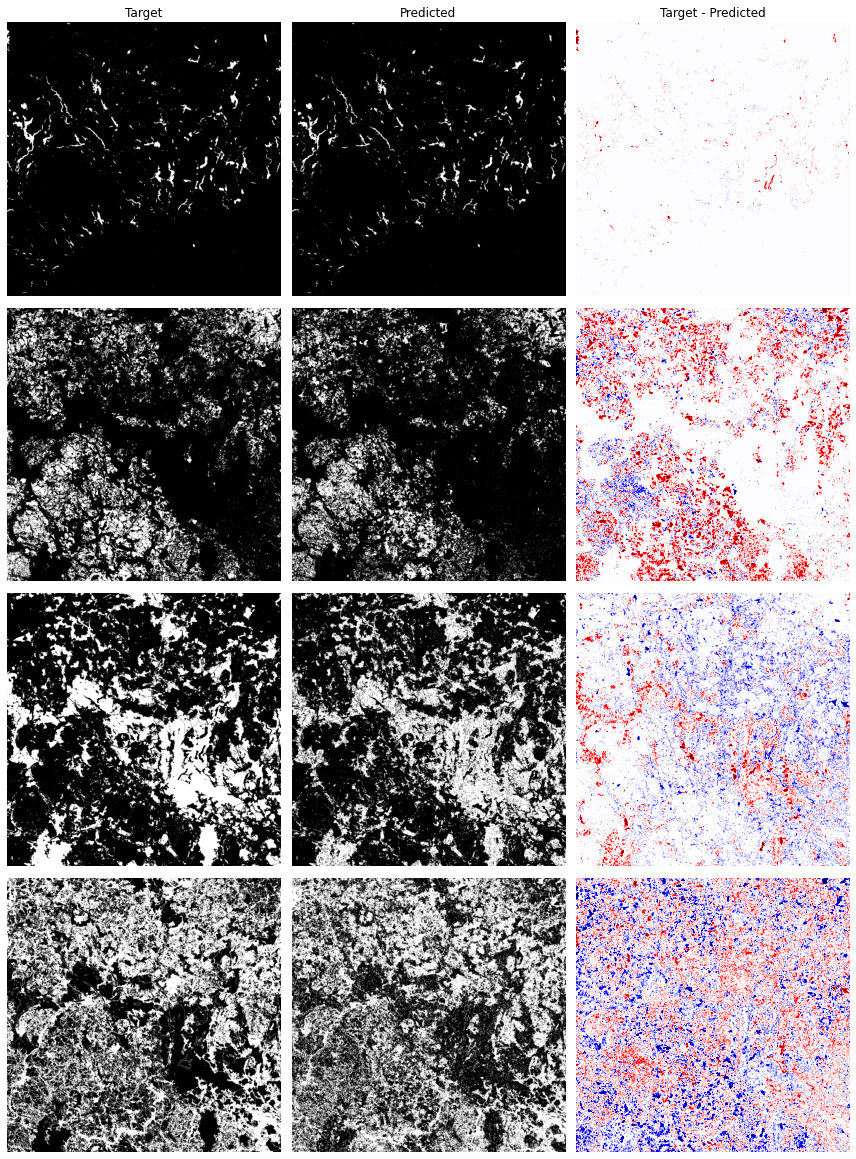

In [12]:
show_target_pred_dif(Y_target, Y_present)